In [3]:
import numpy as np
import pandas as pd
!pip install chardet

In [5]:
df = pd.read_csv(r'\Users\Lucie Montagne\Documents\DATASCIENTEST\PROJET\ADEME-CarLabelling-2023-local.csv', encoding='utf-8', sep=';')
df.head()

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Essai CO2 type 1,Essai HC,Essai Nox,Essai HCNox,Essai particules,Masse OM Min,Masse OM Max,Bonus-Malus,Barème Bonus-Malus,Prix véhicule
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,"0,234","0,012","0,022",NaN,"0,001",1594,1594,Malus,1901.0,31000
1,MAZDA,MX-30,MX-30,AUTRES,MX-30 e-SKYACTIV (145ch),ELECTRIC,TS TERRAINS/CHEMINS,0,INFERIEURE,6,...,NaN,NaN,NaN,NaN,NaN,1720,1720,Bonus 6000,-6000.0,38510
2,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,"0,204","0,007","0,009",NaN,NaN,1545,1545,Malus,400.0,36688
3,SKODA,OCTAVIA,OCTAVIA,VGF,OCTAVIA Berline 2.0 TDI (150ch) DSG7,GAZOLE,BERLINE,1968,MOYENNE SUPERIEURE,8,...,"0,026",NaN,"0,028","0,037",NaN,1461,1461,Neutre 0,NaN,35218
4,JEEP,COMPASS,COMPASS,STELLANTIS,1.3 Turbo T4 (240ch) BVA6 4xe Upland / Trailha...,ELEC+ESSENC HR,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,10,...,"0,326","0,033","0,019",NaN,NaN,1935,1935,Neutre 0,NaN,50100


#I. Découverte des données et du projet#

In [ ]:
# Afficher les informations du df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604 entries, 0 to 3603
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marque                         3604 non-null   object 
 1   Libellé modèle                 3604 non-null   object 
 2   Modèle                         3604 non-null   object 
 3   Groupe                         3604 non-null   object 
 4   Description Commerciale        3604 non-null   object 
 5   Energie                        3604 non-null   object 
 6   Carrosserie                    3604 non-null   object 
 7   Cylindrée                      3604 non-null   int64  
 8   Gamme                          3604 non-null   object 
 9   Puissance fiscale              3604 non-null   int64  
 10  Puissance maximale             3470 non-null   object 
 11  Puissance nominale électrique  788 non-null    object 
 12  Poids à vide                   3604 non-null   i

In [ ]:
df.describe()

,Cylindrée,Puissance fiscale,Poids à vide,Nombre rapports,Masse OM Min,Masse OM Max,Barème Bonus-Malus,Prix véhicule
count,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3111.000000,3.604000e+03
mean,1772.428968,10.276637,1517.322974,6.538291,1592.575194,1603.176748,7196.417229,4.908761e+04
std,719.204816,8.574326,298.164067,1.919539,298.173519,308.214224,9658.717541,4.770311e+04
min,0.000000,2.000000,860.000000,0.000000,935.000000,935.000000,-6000.000000,1.099000e+04
25%,1496.000000,6.000000,1308.750000,6.000000,1383.750000,1395.000000,310.000000,3.324200e+04
50%,1598.000000,8.000000,1480.000000,7.000000,1560.000000,1560.000000,1901.000000,4.146700e+04
75%,1998.000000,10.000000,1745.000000,8.000000,1820.000000,1820.000000,11930.000000,5.565000e+04
max,6749.000000,91.000000,2710.000000,9.000000,2785.000000,2785.000000,49850.000000,1.586530e+06


In [ ]:
# Nombre de lignes et colonnes
df.shape

(3604, 52)

In [ ]:
# Nombre de valeurs manquantes dans chaque colonne
df.isnull().sum()

,0
Marque,0
Libellé modèle,0
Modèle,0
Groupe,0
Description Commerciale,0
Energie,0
Carrosserie,0
Cylindrée,0
Gamme,0
Puissance fiscale,0


In [ ]:
# Taux de valeurs manquantes
pourcentage = (df.isna().mean() * 100).round(0)

print(pourcentage)

Marque                            0.0
Libellé modèle                    0.0
Modèle                            0.0
Groupe                            0.0
Description Commerciale           0.0
Energie                           0.0
Carrosserie                       0.0
Cylindrée                         0.0
Gamme                             0.0
Puissance fiscale                 0.0
Puissance maximale                4.0
Puissance nominale électrique    78.0
Poids à vide                      0.0
Rapport poids-puissance           0.0
Type de boite                     0.0
Nombre rapports                   0.0
Conso basse vitesse Min          10.0
Conso basse vitesse Max           9.0
Conso moyenne vitesse Min        10.0
Conso moyenne vitesse Max         9.0
Conso haute vitesse Min          10.0
Conso haute vitesse Max           9.0
Conso T-haute vitesse Min        10.0
Conso T-haute vitesse Max         9.0
Conso vitesse mixte Min           5.0
Conso vitesse mixte Max           4.0
Conso elec M

#II. Nettoyage des données avant Pré-processing#

Afin de pouvoir poursuivre avec la datavisualisation et les tests statistiques, nous devons apporter quelques modifications sur le jeu de données.

In [ ]:
# Remplacer les , par des . pour pouvoir convertir les données en float
df['Conso basse vitesse Min'] = df['Conso basse vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso basse vitesse Max'] = df['Conso basse vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso moyenne vitesse Min'] = df['Conso moyenne vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso moyenne vitesse Max'] = df['Conso moyenne vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso haute vitesse Min'] = df['Conso haute vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso haute vitesse Max'] = df['Conso haute vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso T-haute vitesse Max'] = df['Conso T-haute vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso T-haute vitesse Min'] = df['Conso T-haute vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso vitesse mixte Min'] = df['Conso vitesse mixte Min'].str.replace(',', '.').astype(float)

In [ ]:
df['Conso vitesse mixte Max'] = df['Conso vitesse mixte Max'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 basse vitesse Min'] = df['CO2 basse vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 moyenne vitesse Min'] = df['CO2 moyenne vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 basse vitesse Max'] = df['CO2 basse vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 moyenne vitesse Max'] = df['CO2 moyenne vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 haute vitesse Min'] = df['CO2 haute vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 vitesse mixte Min'] = df['CO2 vitesse mixte Min'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 vitesse mixte Max'] = df['CO2 vitesse mixte Max'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 haute vitesse Max'] = df['CO2 haute vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 T-haute vitesse Min'] = df['CO2 T-haute vitesse Min'].str.replace(',', '.').astype(float)

In [ ]:
df['CO2 T-haute vitesse Max'] = df['CO2 T-haute vitesse Max'].str.replace(',', '.').astype(float)

In [ ]:
df['Essai CO2 type 1'] = df['Essai CO2 type 1'].str.replace(',', '.').astype(float)

In [ ]:
df['Rapport poids-puissance'] = df['Rapport poids-puissance'].str.replace(',', '.').astype(float)

#III. Exploration et analyse des données avec DataViz’#

In [ ]:
#import des bibliothèques
import seaborn as sns
import matplotlib.pyplot as plt

##a. Distribution des valeurs nulles dans le jeu de données##

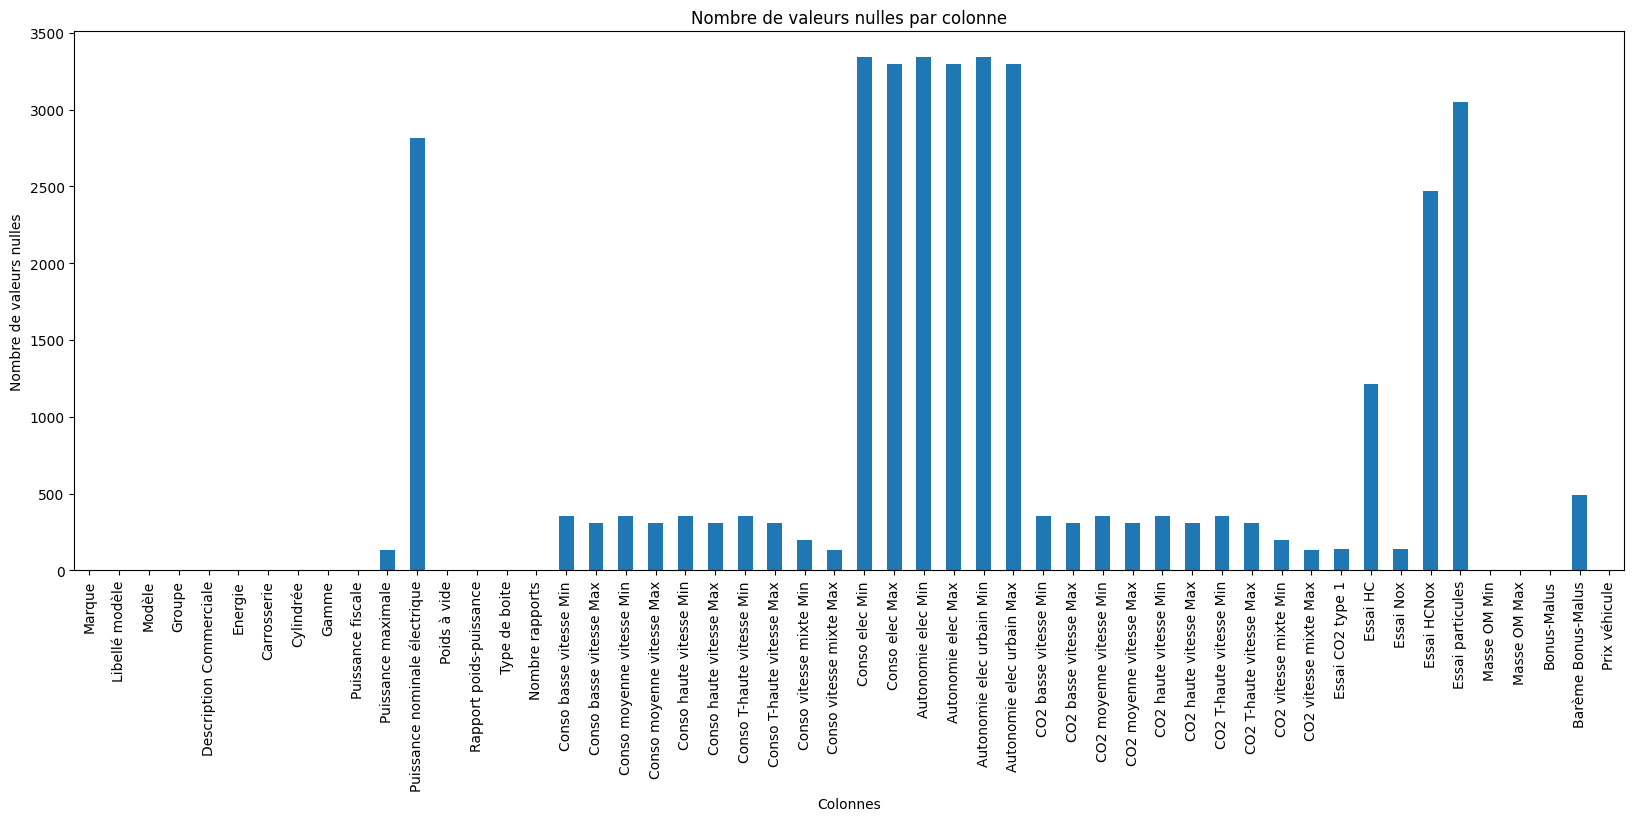

In [ ]:
#Nombre de valeurs nulles par Colonne

null_counts = df.isnull().sum()

plt.figure( figsize = (20, 7))
null_counts.plot(kind='bar')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs nulles')
plt.title('Nombre de valeurs nulles par colonne')

plt.show()


##b. Distribution des caractéristiques des véhicules commercialisées en France##

###Distribution des Marques de voiture###

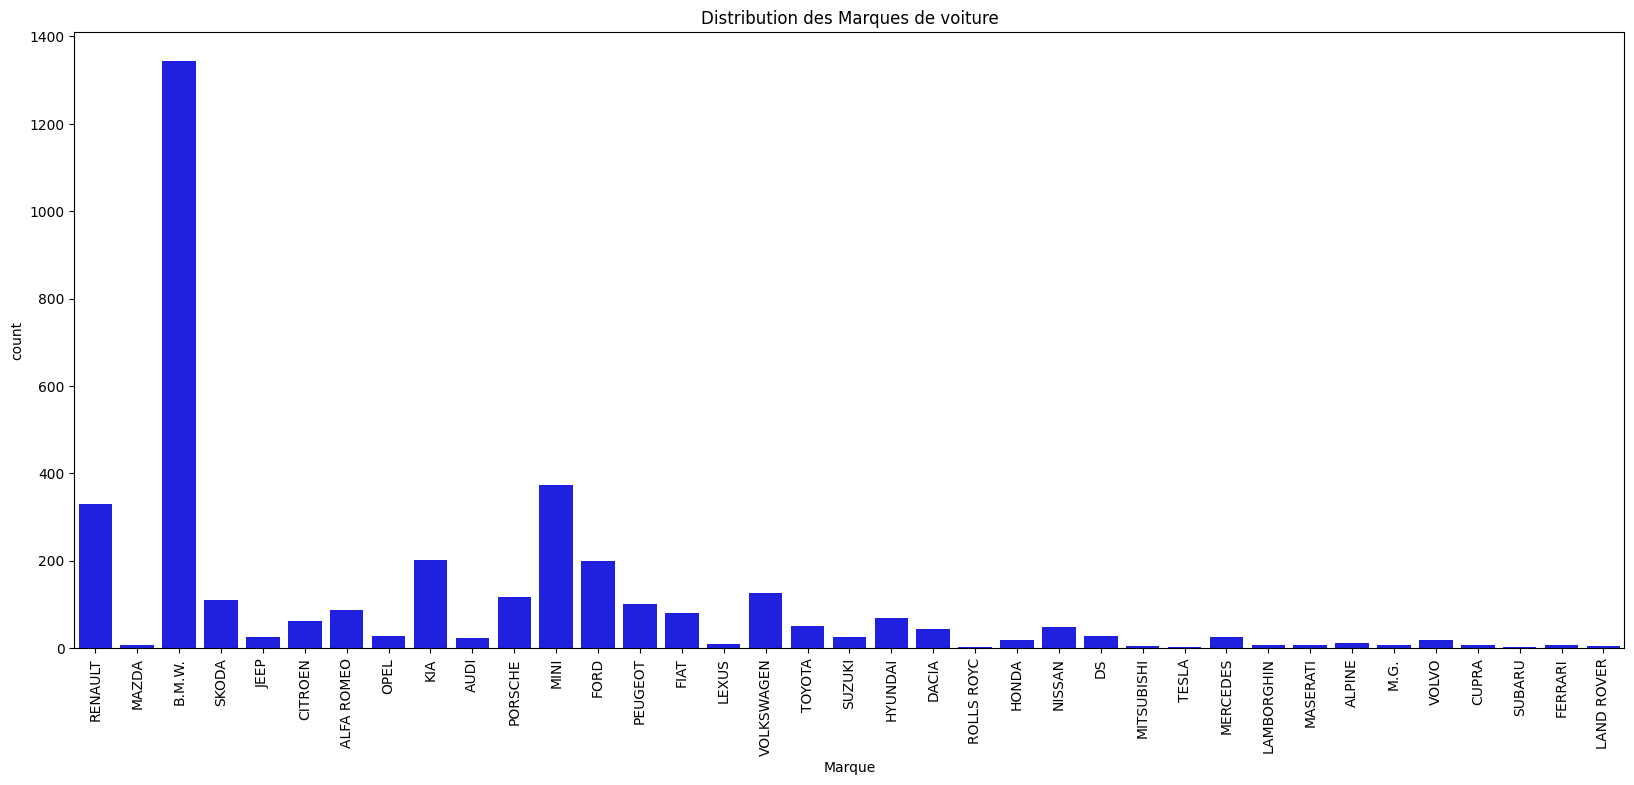

In [ ]:
# Distribution marque de voiture
plt.figure( figsize = (20, 8))
sns.countplot ( x = "Marque", color = 'b', data = df);
plt.xticks(rotation=90)
plt.title ("Distribution des Marques de voiture")
plt.show()

###Distribution des énergies###

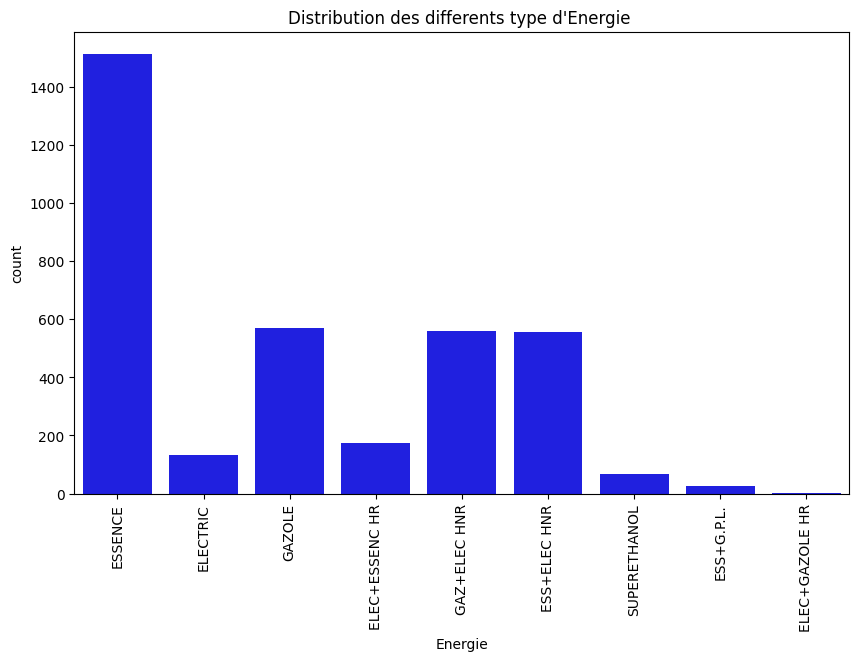

In [ ]:
# Distribution des énergies
plt.figure( figsize = (10, 6))
sns.countplot ( x = "Energie", color = 'b', data = df);
plt.xticks(rotation=90)
plt.title ("Distribution des differents type d'Energie ")
plt.show()

###Distribution des modèles###

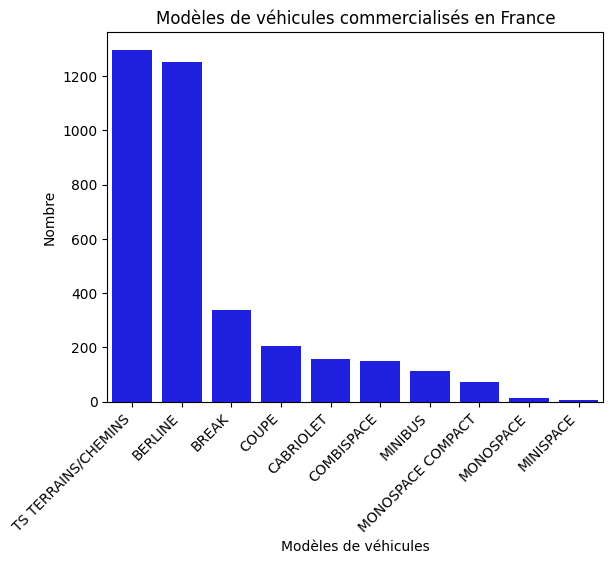

"Les modèles de véhicule les plus commercialisés aujourd'hui en France sont les tous terrains/chemins et les berlines."

In [ ]:
# Distribution des modèles

carrosserie_order = df['Carrosserie'].value_counts().index

sns.countplot(x = 'Carrosserie', color = 'b', data = df, order=carrosserie_order)

plt.title('Modèles de véhicules commercialisés en France')
plt.xlabel('Modèles de véhicules')
plt.ylabel('Nombre')

plt.xticks(rotation=45, ha='right')

plt.show()

'''Les modèles de véhicule les plus commercialisés aujourd'hui en France sont les tous terrains/chemins et les berlines.'''

###Distribution des gammes###

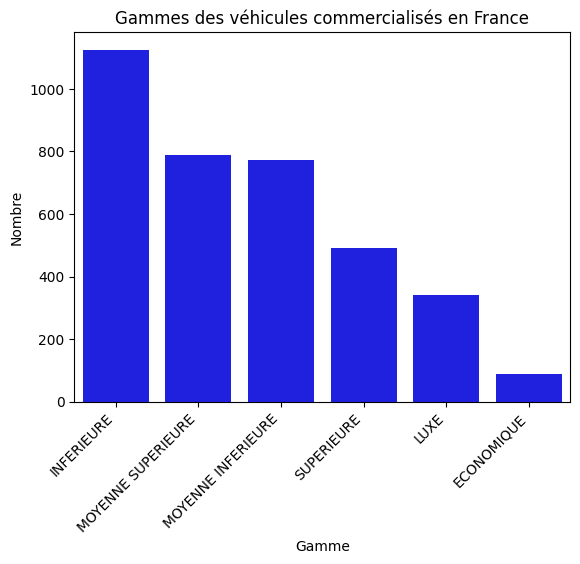

"La gamme de véhicule la plus commercialisée aujourd'hui en France est la gamme inférieure."

In [ ]:
# Distribution des gammes
gamme_order = df['Gamme'].value_counts().index

sns.countplot(x = 'Gamme', color = 'b', data = df, order=gamme_order)

plt.title('Gammes des véhicules commercialisés en France')
plt.xlabel('Gamme')
plt.ylabel('Nombre')

plt.xticks(rotation=45, ha='right')

plt.show()

'''La gamme de véhicule la plus commercialisée aujourd'hui en France est la gamme inférieure.'''

###Distribution de la puissance fiscale des véhicules###

"80% des véhicules du jeu de données dispose d'une puissance fiscale inférieure à 11CV"

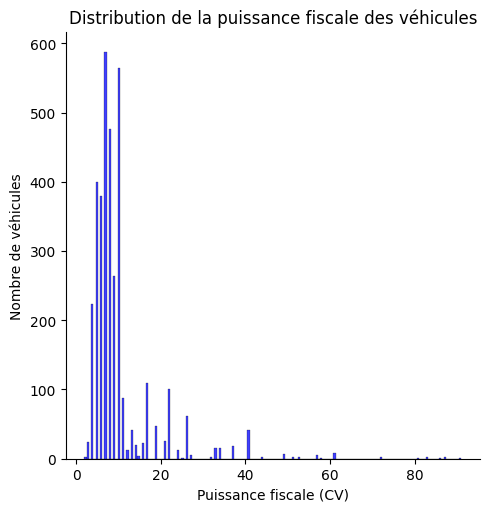

In [ ]:
# Distribution de la puissance fiscale des véhicules

sns.displot(df['Puissance fiscale'], color ='b')
plt.xlabel('Puissance fiscale (CV)')
plt.ylabel('Nombre de véhicules')
plt.title('Distribution de la puissance fiscale des véhicules');

'''80% des véhicules du jeu de données dispose d'une puissance fiscale inférieure à 11CV'''

###Distribution du type de boîte###

"La grande majorité des véhicules disposent d'une boite automatique (66%), puis mécanique (27%) puis à variation électrique et continue (4% et 3%)."

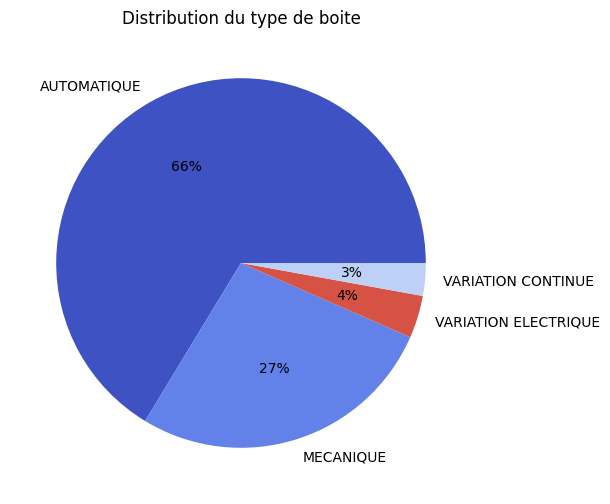

In [ ]:
plt.figure(figsize=(12,6))
type_boite_count = df['Type de boite'].value_counts()
plt.pie(type_boite_count,
        labels=type_boite_count.index,
        colors = ['#3e52c3', '#6282e9', '#d65245', '#bdd0f5',],
        autopct = lambda x : str(round(x))+'%')
plt.title('Distribution du type de boite');

'''La grande majorité des véhicules disposent d'une boite automatique (66%), puis mécanique (27%) puis à variation électrique et continue (4% et 3%).'''

##c. Distribution des caractéristiques des véhicules versus leurs émissions de C02##

###Distribution des émissions de CO2 (g/km)###

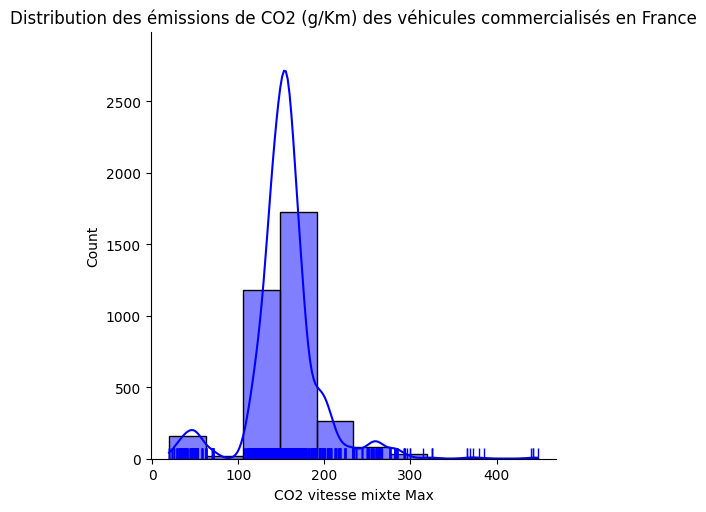

"La courbe est associée à une loi normale. La majorité des véhicules ont des émissions de CO2 situées entre environ 100 et 200 g/km.\nGrâce à la courbe d'estimation de densité, on peut observer un pic aux alentours de 150 g/km, ce qui suggère que c'est la valeur la plus fréquente pour ces véhicules."

In [ ]:
# Distribution des émissions de CO2 (g/km)
sns.displot(df['CO2 vitesse mixte Max'], kde = True, rug = True, bins = 10, color = 'b')

plt.title('Distribution des émissions de CO2 (g/Km) des véhicules commercialisés en France')

plt.show()

'''La courbe est associée à une loi normale. La majorité des véhicules ont des émissions de CO2 situées entre environ 100 et 200 g/km.
Grâce à la courbe d'estimation de densité, on peut observer un pic aux alentours de 150 g/km, ce qui suggère que c'est la valeur la plus fréquente pour ces véhicules.'''

###Distribution des énergies et de leurs émissions de CO2 (g/km)###

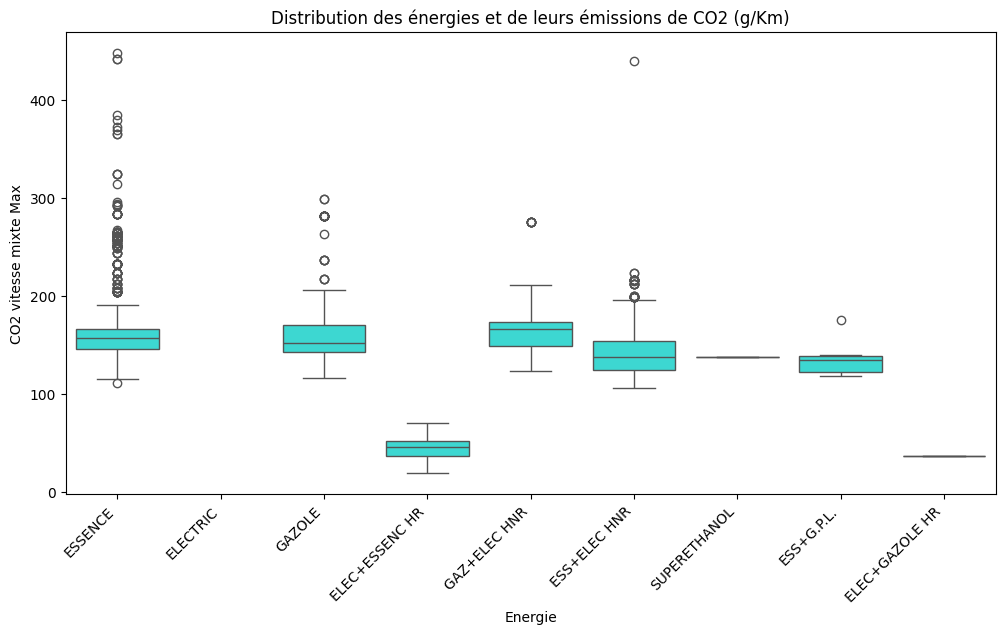

"\nLes véhicules électriques et hybrides rechargables ont les emissions de C02 les plus faibles (<100).\nLes véhicules essence et diesel émettent le plus de CO2. Ils montrent des émissions similaires avec une médiane de 150 g/Km. Cependant, l'essence présente beaucoup de valeurs extrèmes.\nLes véhicules hybrides non rechargables, le GPL et le superethanol ont une médiane qui se rapproche de celles des véhicules essence et diesel. Ils ont cependant moins de valeurs extrèmes.\n\n"

In [ ]:
# Distribution des énergies et de leurs émissions de CO2 (g/km)

plt.figure(figsize=(12, 6))

sns.boxplot(x = 'Energie', y ='CO2 vitesse mixte Max', color = '#23f1e8', data = df)

plt.xticks(rotation=45, ha='right')

plt.title('Distribution des énergies et de leurs émissions de CO2 (g/Km)')

plt.show();

'''
Les véhicules électriques et hybrides rechargables ont les emissions de C02 les plus faibles (<100).
Les véhicules essence et diesel émettent le plus de CO2. Ils montrent des émissions similaires avec une médiane de 150 g/Km. Cependant, l'essence présente beaucoup de valeurs extrèmes.
Les véhicules hybrides non rechargables, le GPL et le superethanol ont une médiane qui se rapproche de celles des véhicules essence et diesel. Ils ont cependant moins de valeurs extrèmes.

'''

###Comparaison des émissions maximales de CO2 par marque de véhicule###

'Les marques les plus émettrices de CO2 sont LAMBORGHINI, ROLLS ROYCE, FERRARI, MASERATI et PORSCHE (gamme LUXE).'

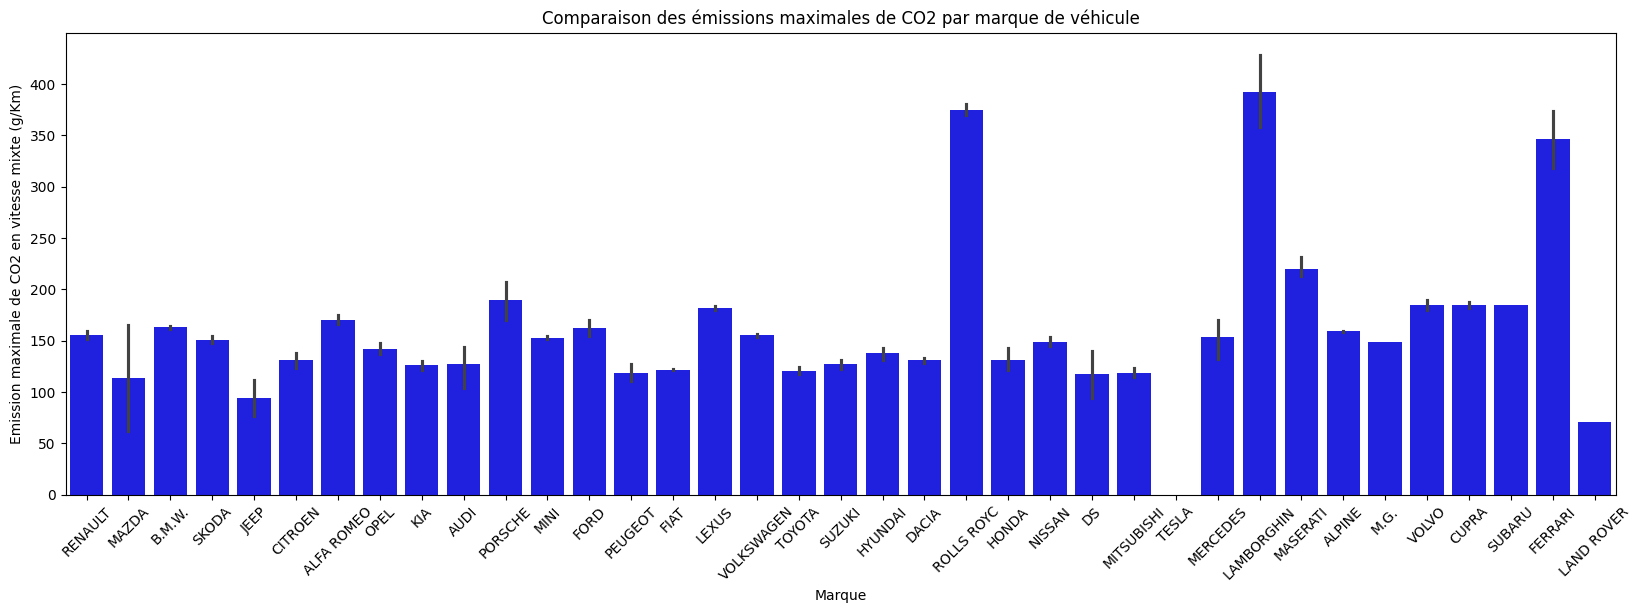

In [ ]:
#Comparaison des émissions maximales de CO2 par marque de véhicule

plt.figure(figsize=(20,6))
sns.barplot(x='Marque', y='CO2 vitesse mixte Max', data = df, color = 'b')
plt.xticks(rotation=45)
plt.xlabel('Marque')
plt.ylabel('Emission maximale de CO2 en vitesse mixte (g/Km)')
plt.title('Comparaison des émissions maximales de CO2 par marque de véhicule');

'''Les marques les plus émettrices de CO2 sont LAMBORGHINI, ROLLS ROYCE, FERRARI, MASERATI et PORSCHE (gamme LUXE).'''

###Distribution des gammes de véhicules et de leurs émissions de CO2 (g/km) ###

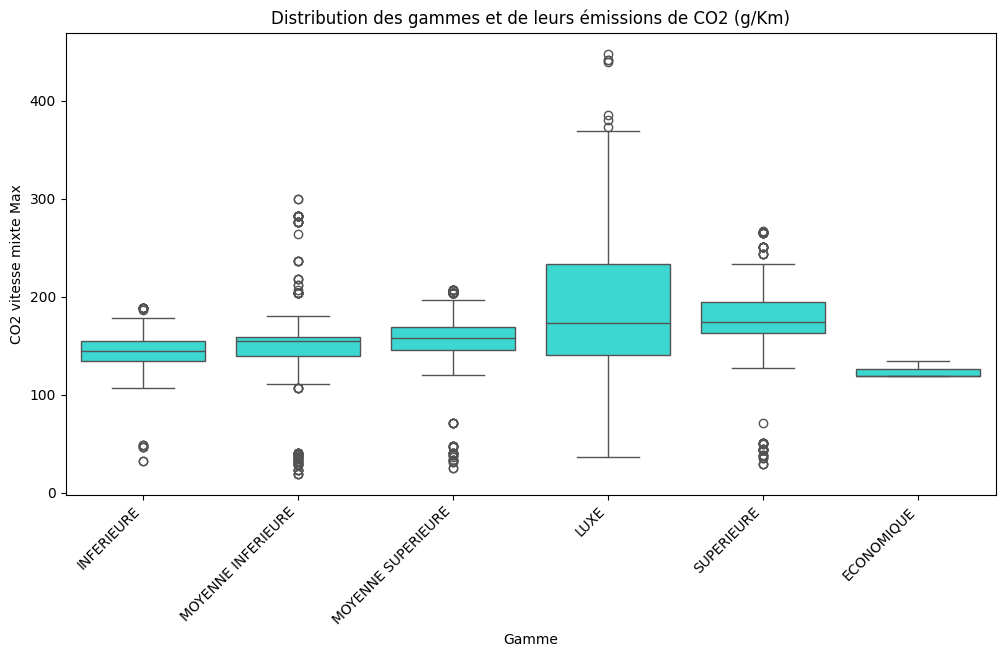

'On observe que les véhicules de gamme Luxe et Supérieure émettent plus de CO2.'

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x = 'Gamme', y ='CO2 vitesse mixte Max', color = '#23f1e8', data = df)

plt.xticks(rotation=45, ha='right')

plt.title('Distribution des gammes et de leurs émissions de CO2 (g/Km)')

plt.show();

'''On observe que les véhicules de gamme Luxe et Supérieure émettent plus de CO2.'''

###Distribution des émissions de CO2 en fonction du type de boîte###

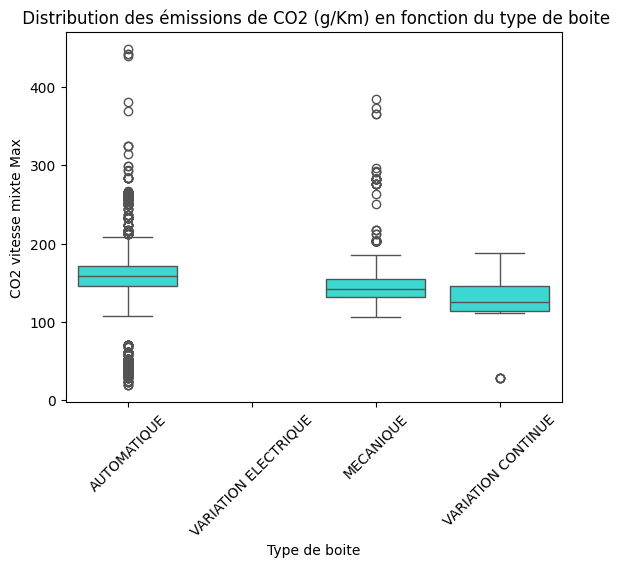

In [ ]:
#Émissions de CO2 / Boite >>>> pour détection des biais (valeurs aberrante)
sns.boxplot(x='Type de boite', y='CO2 vitesse mixte Max', data = df, color = '#23F1E8')
plt.xticks(rotation=45)
plt.ylabel('CO2 vitesse mixte Max')
plt.title(' Distribution des émissions de CO2 (g/Km) en fonction du type de boite');

'''Les boîtes automatiques émettent plus de CO2 que les boîtes mécaniques et à variation continue
avec une médiane située autour des 150g de CO2/Km (à une vitesse mixte maximum),
contre 130g de CO2/Km pour les boîtes mécaniques et 120g de CO2/Km pour les boîtes à variation continue.'''

##d. Relations entre les variables quantitatives##

###Heatmap des variables quantitatives###

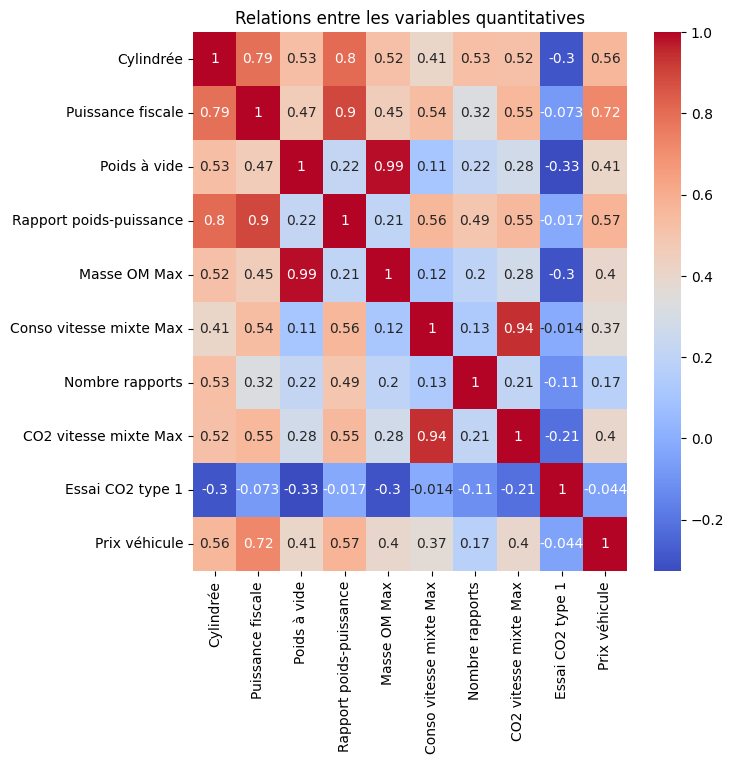

"\nOn observe une forte corrélation positive entre :\n\n- La consommation d'un véhicule et son émission de CO2 (0,94)\n- La puissance fiscale et le rapport poids-puissance (0,9)\n- Le rapport poids-puissance et la cylindrée( 0,8)\n- Le poids à vide et Masse OM Max (0,99)\n- La puissance fiscale et Cylindrée (0,79)\n."

In [ ]:
# Heatmap des variables quantitatives

cor = df[['Cylindrée', 'Puissance fiscale', 'Poids à vide', 'Rapport poids-puissance', 'Masse OM Max', 'Conso vitesse mixte Max', 'Nombre rapports', 'CO2 vitesse mixte Max', 'Essai CO2 type 1', 'Prix véhicule']].corr() # sélection des variables quantitatives

# et calcul des corrélations entre ces variables
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

plt.title('Relations entre les variables quantitatives')
plt.show()

'''
On observe une forte corrélation positive entre :

- La consommation d'un véhicule et son émission de CO2 (0,94)
- La puissance fiscale et le rapport poids-puissance (0,9)
- Le rapport poids-puissance et la cylindrée( 0,8)
- Le poids à vide et Masse OM Max (0,99)
- La puissance fiscale et Cylindrée (0,79)
.'''

###Relation entre la consommation de carburant et l’émission de CO2###

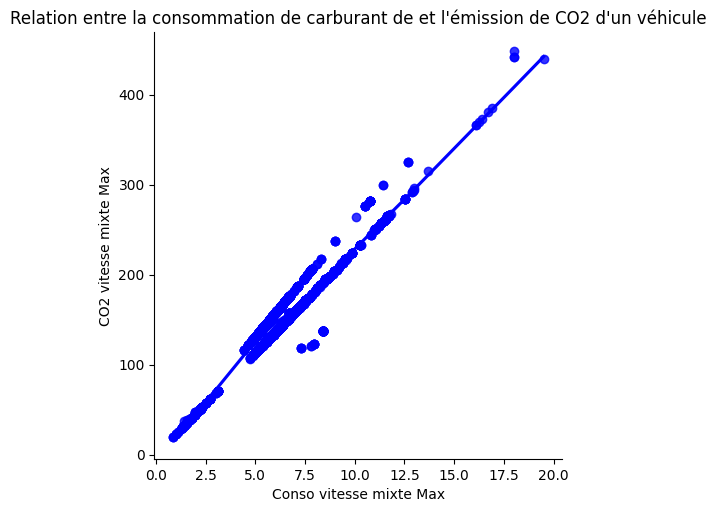

'On observe une correlation positive entre ces 2 variables. '

In [ ]:
sns.lmplot(x="Conso vitesse mixte Max", y="CO2 vitesse mixte Max",
           data=df,
           lowess=True,
           scatter_kws={'color': 'b'},  # Couleur des points
           line_kws={'color': 'b'})     # Couleur de la ligne

plt.title('Relation entre la consommation de carburant de et l\'émission de CO2 d\'un véhicule')

plt.show()

'''On observe une correlation positive entre ces 2 variables. '''

###Relation entre la puissance fiscale et l’émission de CO2###

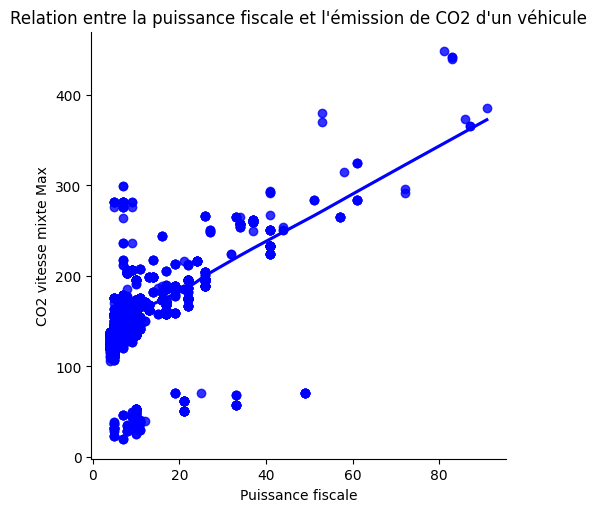

'On observe une correlation positive entre ces 2 variables. La plupart des véhicules entre 1000 et 1750 kg ont une émission de CO2 comprise entre 100 et 200 g/km. On observe tout de même des valeurs extrèmes. '

In [ ]:
# Relation entre la consommation de carburant et l’émission de CO2

sns.lmplot(x="Puissance fiscale", y="CO2 vitesse mixte Max",
           data=df,
           lowess=True,
           scatter_kws={'color': 'b'},  # Couleur des points
           line_kws={'color': 'b'})     # Couleur de la ligne

plt.title('Relation entre la puissance fiscale et l\'émission de CO2 d\'un véhicule')

plt.show()

'''On observe une correlation positive entre ces 2 variables. La plupart des véhicules entre 1000 et 1750 kg ont une émission de CO2 comprise entre 100 et 200 g/km. On observe tout de même des valeurs extrèmes. '''

##e. Relations entre les variables catégorielles et quantitatives##

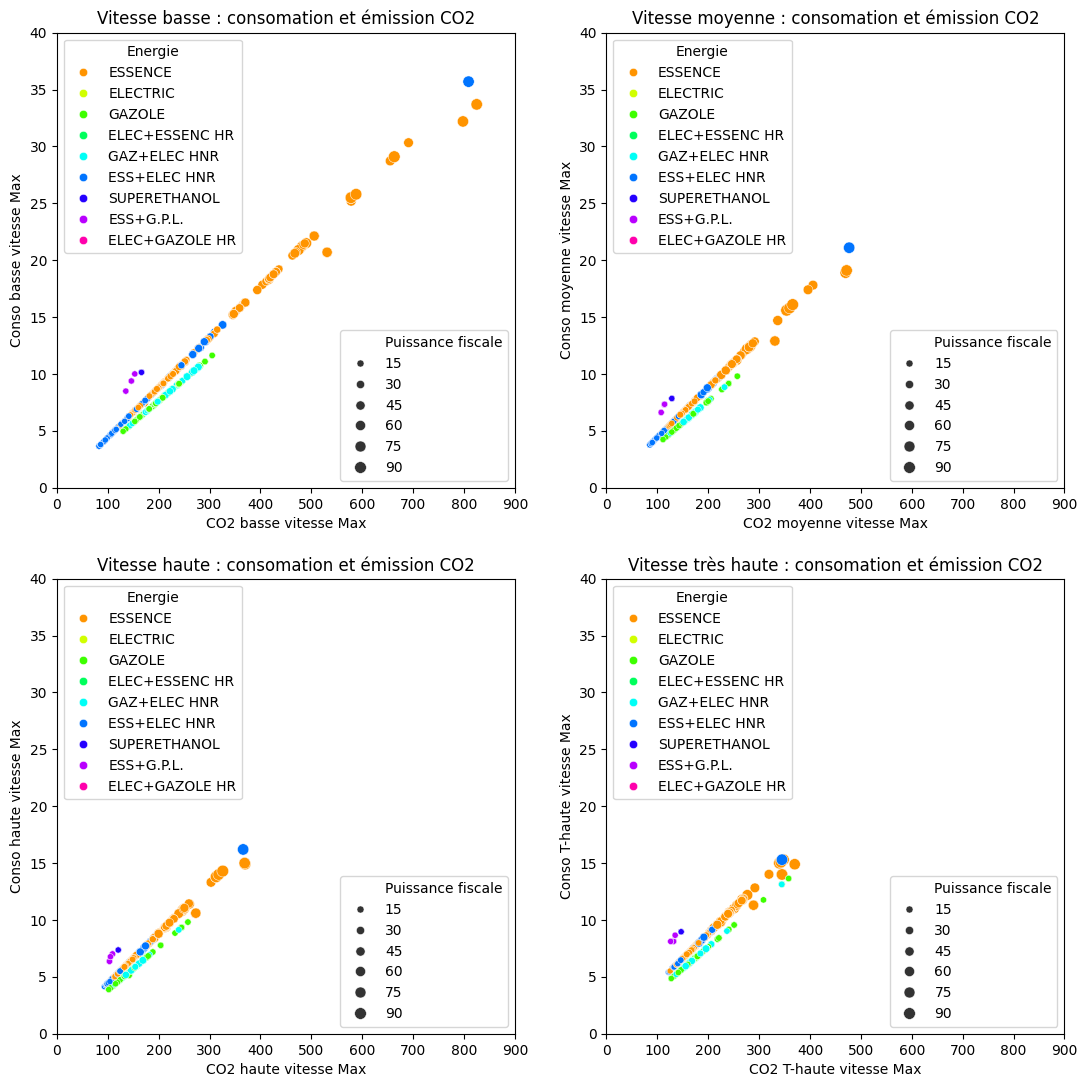

'On observe :\nune corrélation positive entre ces variables ;\nPlus un véhicule est puissant et plus il émet de CO2.\nLes véhicules les plus puissants ont un moteur essence.\nEn vitesse basse, les véhicules à moteur essence et puissants consomment plus d’énergie et émettent beaucoup plus de CO2 (entre 400 et 800 g/km). Plus la vitesse augmente et moins les véhicules à essence émettent de CO2.\nA l’inverse, plus la vitesse augmente et plus certains véhicules diesel consomment du carburant et émettent du CO2.\n'

In [ ]:
# Relation entre la puissance fiscale, la consommation, l’énergie  et l’émission de CO2

fig = plt.figure(figsize=(13,13))

palette = sns.color_palette('hsv', n_colors=len(df['Energie'].unique()))

plt.subplot(221)
sns.scatterplot(x = "CO2 basse vitesse Max", y = "Conso basse vitesse Max", hue = "Energie", palette=palette, size = 'Puissance fiscale', data = df)
plt.title('Vitesse basse : consomation et émission CO2')
# Créer deux légendes distinctes
h, l = plt.gca().get_legend_handles_labels()  # Récupère les objets de la légende
# Diviser la légende en deux : une pour l'énergie et une pour la puissance fiscale
leg1 = plt.legend(h[1:10], l[1:10], loc="upper left", title="Energie")  # Légende pour l'énergie
plt.gca().add_artist(leg1)  # Ajouter la première légende sur le graphique
# Deuxième légende pour la puissance fiscale
plt.legend(h[10:], l[10:], loc="lower right")
plt.xlim(0, 900)
plt.ylim(0, 40);

palette = sns.color_palette('hsv', n_colors=len(df['Energie'].unique()))
plt.subplot(222)
sns.scatterplot(x = "CO2 moyenne vitesse Max", y = "Conso moyenne vitesse Max", hue = "Energie", palette=palette, size = 'Puissance fiscale', data = df)
plt.title('Vitesse moyenne : consomation et émission CO2')
# Créer deux légendes distinctes
h, l = plt.gca().get_legend_handles_labels()  # Récupère les objets de la légende
# Diviser la légende en deux : une pour l'énergie et une pour la puissance fiscale
leg1 = plt.legend(h[1:10], l[1:10], loc="upper left", title="Energie")  # Légende pour l'énergie
plt.gca().add_artist(leg1)  # Ajouter la première légende sur le graphique
# Deuxième légende pour la puissance fiscale
plt.legend(h[10:], l[10:], loc="lower right")
plt.xlim(0, 900)
plt.ylim(0, 40);

palette = sns.color_palette('hsv', n_colors=len(df['Energie'].unique()))
plt.subplot(223)
sns.scatterplot(x = "CO2 haute vitesse Max", y = "Conso haute vitesse Max", hue = "Energie", palette=palette, size = 'Puissance fiscale', data = df)
plt.title('Vitesse haute : consomation et émission CO2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Créer deux légendes distinctes
h, l = plt.gca().get_legend_handles_labels()  # Récupère les objets de la légende
# Diviser la légende en deux : une pour l'énergie et une pour la puissance fiscale
leg1 = plt.legend(h[1:10], l[1:10], loc="upper left", title="Energie")  # Légende pour l'énergie
plt.gca().add_artist(leg1)  # Ajouter la première légende sur le graphique
# Deuxième légende pour la puissance fiscale
plt.legend(h[10:], l[10:], loc="lower right")
plt.xlim(0, 900)
plt.ylim(0, 40);

palette = sns.color_palette('hsv', n_colors=len(df['Energie'].unique()))
plt.subplot(224)
sns.scatterplot(x = "CO2 T-haute vitesse Max", y = "Conso T-haute vitesse Max", hue = "Energie", palette=palette, size = 'Puissance fiscale', data = df)
plt.title('Vitesse très haute : consomation et émission CO2')
# Créer deux légendes distinctes
h, l = plt.gca().get_legend_handles_labels()  # Récupère les objets de la légende
# Diviser la légende en deux : une pour l'énergie et une pour la puissance fiscale
leg1 = plt.legend(h[1:10], l[1:10], loc="upper left", title="Energie")  # Légende pour l'énergie
plt.gca().add_artist(leg1)  # Ajouter la première légende sur le graphique
# Deuxième légende pour la puissance fiscale
plt.legend(h[10:], l[10:], loc="lower right")
plt.xlim(0, 900)
plt.ylim(0, 40);


plt.show()

'''On observe :
une corrélation positive entre ces variables ;
Plus un véhicule est puissant et plus il émet de CO2.
Les véhicules les plus puissants ont un moteur essence.
En vitesse basse, les véhicules à moteur essence et puissants consomment plus d’énergie et émettent beaucoup plus de CO2 (entre 400 et 800 g/km). Plus la vitesse augmente et moins les véhicules à essence émettent de CO2.
A l’inverse, plus la vitesse augmente et plus certains véhicules diesel consomment du carburant et émettent du CO2.
'''

#IV. Tests statistiques#

##a. Tests statistiques des valeurs quantitatives##

###Corrélation entre l’émission de CO2 et le type d'énergie###

In [ ]:
# Le test ANOVA :
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Remplacer les espaces par des '_' dans le titre des colonnes. Sinon le code ne fonctionne pas.
df = df.rename(columns={'CO2 vitesse mixte Max': 'CO2_vitesse_mixte_Max'})

# Réalisation du test ANOVA
result = smf.ols('CO2_vitesse_mixte_Max ~ Energie', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

              df        sum_sq        mean_sq           F  PR(>F)
Energie      8.0  2.380666e+06  297583.264655  299.868681     0.0
Residual  3462.0  3.435615e+06     992.378608         NaN     NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


###Corrélation entre l’émission de CO2 et du type de boîte (automatique, mécanique…)###

In [ ]:
# Le test ANOVA :

# Remplacer les espaces par des '_' dans le titre des colonnes. Sinon le code ne fonctionne pas.
df = df.rename(columns={'Type de boite': 'Type_de_boite'})

# Réalisation du test ANOVA
result = smf.ols('CO2_vitesse_mixte_Max ~ Type_de_boite', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

                   df        sum_sq       mean_sq         F        PR(>F)
Type_de_boite     3.0  1.287460e+05  42915.336514  26.10714  1.075324e-16
Residual       3467.0  5.699110e+06   1643.816050       NaN           NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


###Corrélation entre l’émission de CO2 et le type de carrosserie###

In [ ]:
# Le test ANOVA :

# Réalisation du test ANOVA
result = smf.ols('CO2_vitesse_mixte_Max ~ Carrosserie', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

                 df        sum_sq        mean_sq           F         PR(>F)
Carrosserie     9.0  1.271970e+06  141330.008916  107.622126  3.334533e-178
Residual     3460.0  4.543692e+06    1313.205878         NaN            NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


###Corrélation entre la gamme et l'émission de CO2###

In [ ]:
# Le test ANOVA :

# Réalisation du test ANOVA
result = smf.ols('CO2_vitesse_mixte_Max ~ Gamme', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

              df        sum_sq        mean_sq          F        PR(>F)
Gamme        5.0  5.291808e+05  105836.157286  69.349801  2.605490e-69
Residual  3464.0  5.286482e+06    1526.120563        NaN           NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


###Corrélation entre le nombre de rapport et le type de boîte (automatique, mécanique…)###

In [ ]:
#  Le test ANOVA :

# Remplacer les espaces par des '_' dans le titre des colonnes. Sinon le code ne fonctionne pas.
df = df.rename(columns={'Nombre rapports': 'nombre_rapports'})

# Réalisation du test ANOVA
result = smf.ols('nombre_rapports ~ Type_de_boite', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

                   df        sum_sq      mean_sq            F  PR(>F)
Type_de_boite     3.0  11614.307002  3871.435667  8388.764897     0.0
Residual       3600.0   1661.408869     0.461502          NaN     NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


###Corrélation entre la gamme et la puissance fiscale###

In [ ]:
# Le test ANOVA :

# Remplacer les espaces par des '_' dans le titre des colonnes. Sinon le code ne fonctionne pas.
df = df.rename(columns={'Puissance fiscale': 'Puissance_fiscale'})

# Réalisation du test ANOVA
result = smf.ols('Puissance_fiscale ~ Gamme', data=df).fit()  # Utilisation des underscores
table = sm.stats.anova_lm(result)

# Affichage du tableau ANOVA
print(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

              df         sum_sq       mean_sq           F  PR(>F)
Gamme        5.0  101545.432805  20309.086561  447.351606     0.0
Residual  3598.0  163343.760036     45.398488         NaN     NaN
Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


##b. Tests statistiques des valeurs quantitatives##

In [ ]:
# Pour pouvoir réaliser les tests statistiques sur les variables quantitatives, nous allons devoir traiter les valeurs manquantes pour les variables concernées : Conso vitesse mixte Max et CO2_vitesse_mixte_Max
# Nous avions décidé de supprimer les lignes en rapport avec les véhicules électriques et de remplacer les valeurs manquantes par la médiane.

# suppression des lignes concernant les véhicules électriques (non concernés par la problématique)
df = df[df['Energie'] != 'ELECTRIC']

# Remplacement des valeurs manquantes par la médiane
df['Conso vitesse mixte Max'].fillna(df['Conso vitesse mixte Max'].median(), inplace=True)
df['CO2_vitesse_mixte_Max'].fillna(df['CO2_vitesse_mixte_Max'].median(), inplace=True)

<ipython-input-72-283e300564f4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Conso vitesse mixte Max'].fillna(df['Conso vitesse mixte Max'].median(), inplace=True)
<ipython-input-72-283e300564f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conso vitesse mixte Max'].fillna(df['Conso vitesse mixte Max'].median(), inplace=True)
<

###Corrélation entre la consommation de carburant###

In [ ]:
#  Écrire les hypothèses et réaliser un test de Pearson.

## Les hypothèses :
# H0 : Les variables tension et âge ne sont pas corrélées
# H1 : Les deux variables sont corrélées

## Le test :
from scipy.stats import pearsonr
pearsonr(x = df["Conso vitesse mixte Max"], y = df["CO2_vitesse_mixte_Max"])

print("p-value: ", pearsonr(x = df["Conso vitesse mixte Max"], y = df["CO2_vitesse_mixte_Max"])[1])
print("coefficient: ", pearsonr(x = df["Conso vitesse mixte Max"], y = df["CO2_vitesse_mixte_Max"])[0])

# la p-valeur est très petite < 0.05, on rejette H0 et on conclut H1
# c'est-à-dire qu'il y a une corrélation entre les variables tension et âge.

# une p-valeur < α, indique une corrélation statistiquement significatitive entre les
# variables x et y. Le coefficient nous permet de voir l'intensité de la corrélation.

p-value:  0.0
coefficient:  0.9419586219831091


###Corrélation entre la cylindrée et la puissance fiscale###

In [ ]:
#  Écrire les hypothèses et réaliser un test de Pearson.

## Les hypothèses :
# H0 : Les variables tension et âge ne sont pas corrélées
# H1 : Les deux variables sont corrélées

## Le test :
from scipy.stats import pearsonr
pearsonr(x = df["Cylindrée"], y = df["Puissance_fiscale"])

print("p-value: ", pearsonr(x = df["Cylindrée"], y = df["Puissance_fiscale"])[1])
print("coefficient: ", pearsonr(x = df["Cylindrée"], y = df["Puissance_fiscale"])[0])

# la p-valeur est très petite < 0.05, on rejette H0 et on conclut H1
# c'est-à-dire qu'il y a une corrélation entre les variables tension et âge.

# une p-valeur < α, indique une corrélation statistiquement significatitive entre les
# variables x et y. Le coefficient nous permet de voir l'intensité de la corrélation.

p-value:  0.0
coefficient:  0.7909719947282163
